In [ ]:
#setup the Kaggle API
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"mamindla809","key":"f8fb56d25c8ae428ca189a0bf5a45916"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#downloading the dataset
!kaggle datasets download -d sshubam/insat3d-infrared-raw-cyclone-images-20132021

 95% 41.0M/43.2M [00:01<00:00, 30.4MB/s]
100% 43.2M/43.2M [00:01<00:00, 30.3MB/s]


In [ ]:
#unzips the dataset
!unzip /content/insat3d-infrared-raw-cyclone-images-20132021.zip

Archive:  /content/insat3d-infrared-raw-cyclone-images-20132021.zip
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/101.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/102.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/106.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/111.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/112.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/115.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/118.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/119.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/128.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/25.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/27.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/28.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/30(1).jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/30.jpeg  
  inflating: insat3d_for

##First we visualise the data

In [ ]:
#visualise the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
pd.read_csv("/content/insat_3d_ds - Sheet.csv")

,img_name,label
0,25.jpg,25
1,27.jpg,27
2,28.jpg,28
3,30.jpg,30
4,30(1).jpg,30
...,...,...
131,112.jpg,112
132,115.jpg,115
133,118.jpg,118
134,119.jpg,119


In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/insat3d_ir_cyclone_ds"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 1 directories and 0 images in '/content/insat3d_ir_cyclone_ds'.
There are 0 directories and 136 images in '/content/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED'.


In [ ]:
os.mkdir("test_data")

In [ ]:
import os
import shutil

source = '/content/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED'
destination = '/content/test_data'

# gather all files
allfiles = os.listdir(source)

# iterate on all files to move them to destination folder
for f in allfiles[133:]:

    src_path = os.path.join(source, f)
    dst_path = os.path.join(destination, f)
    shutil.move(src_path, dst_path)


In [ ]:
#Get the classes drammatically
import pathlib
data_dir=pathlib.Path("/content/insat3d_ir_cyclone_ds")
data_dir

PosixPath('/content/insat3d_ir_cyclone_ds')

In [ ]:
#Let visualise our images
import random
def view_random_image(target_dir):
  target_folder=target_dir
  random_image=random.sample(os.listdir(target_folder),10)
  plt.figure(figsize=(10,10))
  for i in range(10):
    img=mpimg.imread(target_folder+"/"+random_image[i])
    plt.subplot(5,2,i+1)
    plt.imshow(img)
    plt.title(random_image[i])
    plt.axis("off");#Default axis is on

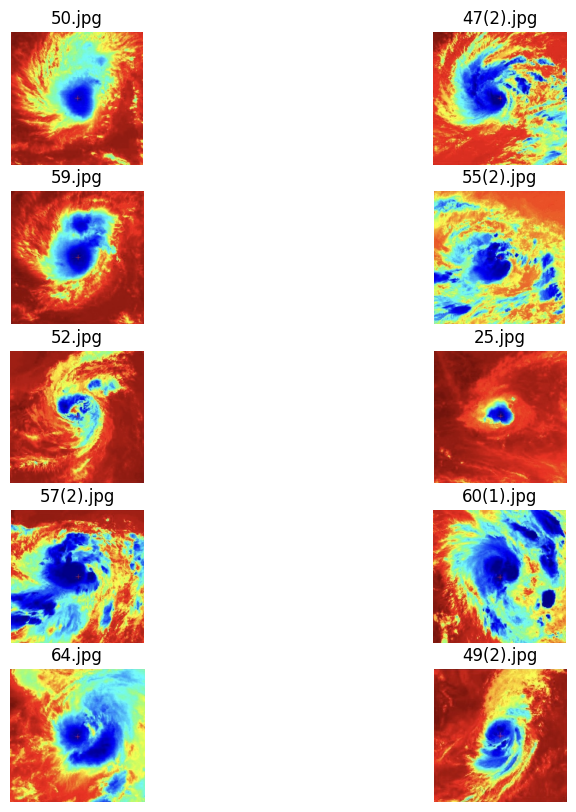

In [ ]:
view_random_image("/content/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED")

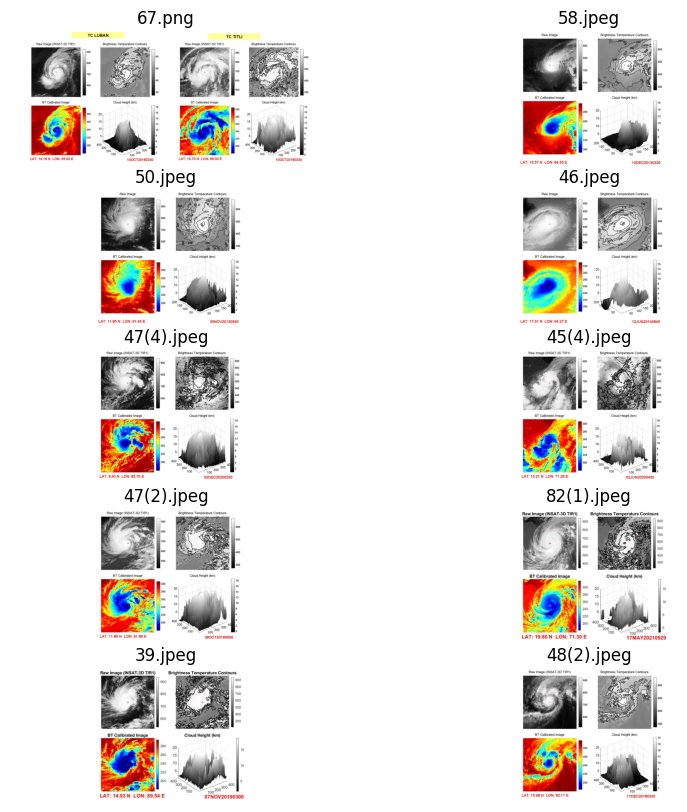

In [ ]:
view_random_image("/content/insat3d_for_reference_ds/CYCLONE_DATASET")

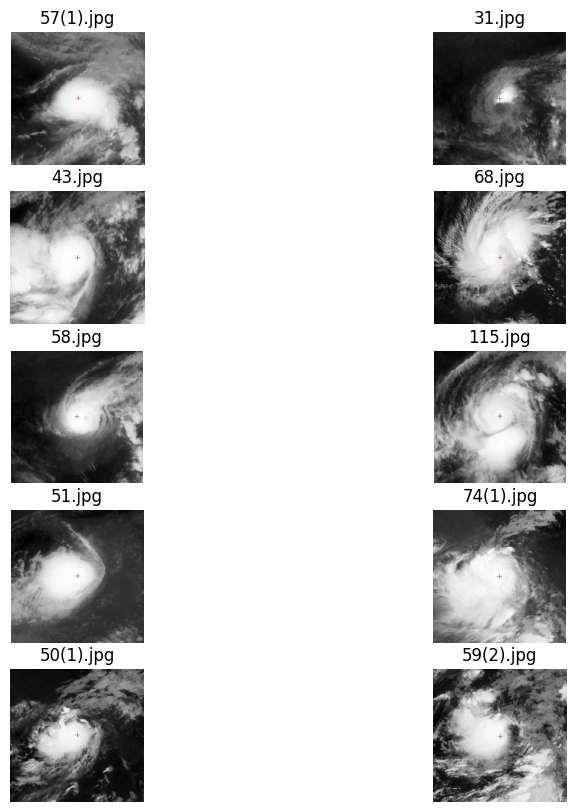

In [ ]:
view_random_image("/content/insat3d_raw_cyclone_ds/CYCLONE_DATASET_FINAL")

#Preprocess the data

In [ ]:
#preprocess the data
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train=pd.read_csv("/content/insat_3d_ds - Sheet.csv")

In [ ]:
train_dir="/content/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED"
train_datagen=ImageDataGenerator(rescale=1./255)
train_data=train_datagen.flow_from_dataframe(train,train_dir,
                                             x_col='img_name',
                                             y_col="label",
                                             subset='training',
                                             target_size=(256,256),
                                             batch_size=16,
                                             class_mode="raw"
                                             )


Found 133 validated image filenames.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 3 invalid image filename(s) in x_col="img_name". These filename(s) will be ignored.
  warnings.warn(


#Create a model

In [ ]:
#creating a model
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,Input
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
inputs=Input(shape=(256,256,3))
y=Conv2D(256,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(inputs)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(256,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y=Conv2D(256,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(128,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y=Conv2D(128,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(64,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y=Conv2D(64,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(32,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y=Conv2D(32,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(16,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y= Flatten()(y)
outputs=Dense(1,activation='linear')(y)
model_1=Model(inputs=inputs,outputs=outputs)

In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 256)     7168      
                                                                 
 batch_normalization (Batch  (None, 256, 256, 256)     1024      
 Normalization)                                                  
                                                                 
 tf.nn.relu (TFOpLambda)     (None, 256, 256, 256)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 256)     590080    
                                                                 
 batch_normalization_1 (Bat  (None, 256, 256, 256)     1024      
 chNormalization)                                            

In [ ]:
model_1.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(lr=0.002),
                metrics=["mse"])
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="loss",patience=10,mode='min')

In [ ]:
history_1=model_1.fit(train_data,
                      epochs=50,callbacks=[early_stopping])

Epoch 1/50
9/9 [==============================] - 76s 3s/step - loss: 3646.3599 - mse: 3160.5847
Epoch 2/50
9/9 [==============================] - 7s 758ms/step - loss: 2532.0488 - mse: 2043.7706
Epoch 3/50
9/9 [==============================] - 7s 767ms/step - loss: 1787.4675 - mse: 1298.0483
Epoch 4/50
9/9 [==============================] - 7s 770ms/step - loss: 1288.7449 - mse: 799.2234
Epoch 5/50
9/9 [==============================] - 7s 828ms/step - loss: 987.4573 - mse: 498.5502
Epoch 6/50
9/9 [==============================] - 7s 836ms/step - loss: 815.4680 - mse: 327.5475
Epoch 7/50
9/9 [==============================] - 7s 756ms/step - loss: 773.6426 - mse: 286.9071
Epoch 8/50
9/9 [==============================] - 7s 822ms/step - loss: 719.2479 - mse: 233.9522
Epoch 9/50
9/9 [==============================] - 7s 823ms/step - loss: 672.4575 - mse: 188.6553
Epoch 10/50
9/9 [==============================] - 7s 764ms/step - loss: 638.8605 - mse: 156.5849
Epoch 11/50
9/9 [=======

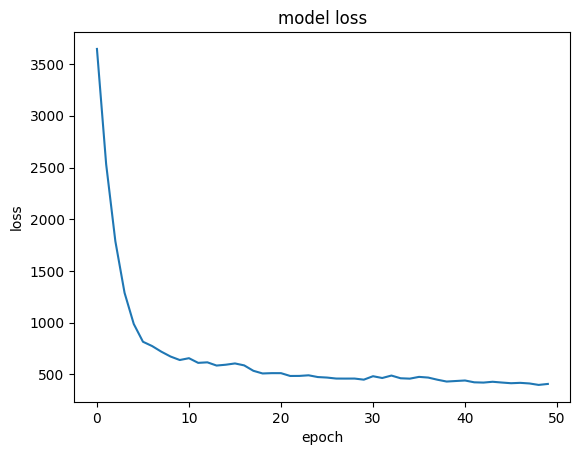

In [ ]:
plt.plot(history_1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
def load_and_prep_image(filename, img_shape=256):

  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

In [ ]:
def pred_and_plot(model, filename):
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

# Plot the image and predicted value
  plt.imshow(img)
  plt.title(f"Prediction: {pred}")
  plt.axis(False);

1/1 [==============================] - 2s 2s/step


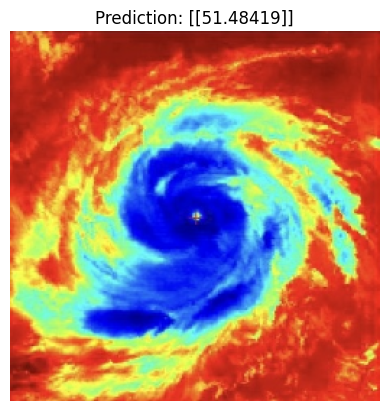

In [ ]:
pred_and_plot(model_1,"/content/test_data/101.jpg")

1/1 [==============================] - 0s 19ms/step


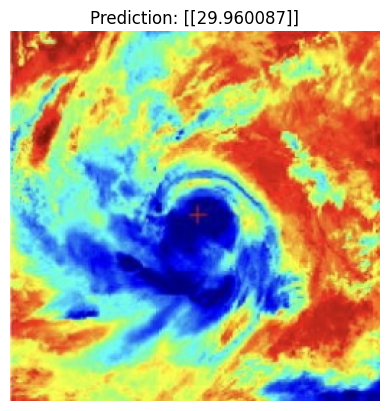

In [ ]:
pred_and_plot(model_1,"/content/test_data/65(3).jpg")

1/1 [==============================] - 0s 18ms/step


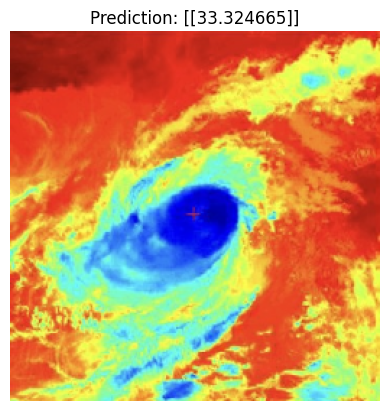

In [ ]:
pred_and_plot(model_1,"/content/test_data/77(1).jpg")

1/1 [==============================] - 0s 18ms/step


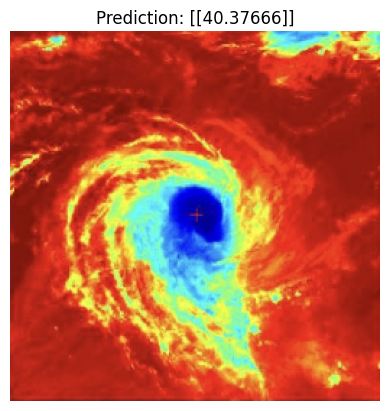

In [ ]:
pred_and_plot(model_1,"/content/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED/69.jpg")

1/1 [==============================] - 0s 19ms/step


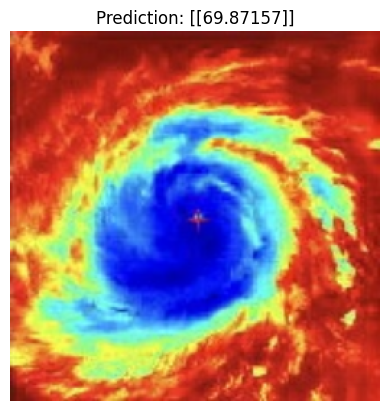

In [ ]:
pred_and_plot(model_1,"/content/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED/102.jpg")

1/1 [==============================] - 0s 19ms/step


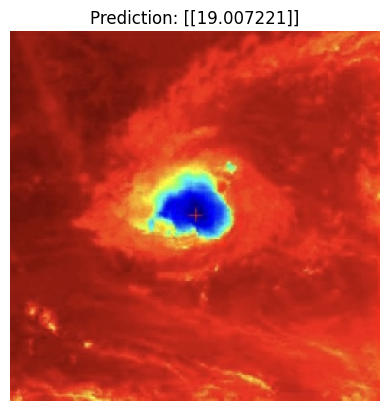

In [ ]:
pred_and_plot(model_1,"/content/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED/25.jpg")

In [ ]:
model_1.save('Cyclone.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
